# Modeling and Simulation in Python

Audrey Lee


In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [119]:
init  = State(R = 0, L = 0, E = 0, V = 4 * 10 ** (-7))
system = System(tau = .2, gamma = 1.36, mu = 1.36 * 10 ** (-3), beta = .00027, 
                rho = .1, alpha = 3.6 * 10 ** (-2), omega = 2, delta = .33, pi = 100)
print(system)

tau        0.20000
gamma      1.36000
mu         0.00136
beta       0.00027
rho        0.10000
alpha      0.03600
omega      2.00000
delta      0.33000
pi       100.00000
dtype: float64


In [133]:
def update_func(state, t, system):
    R, L, E, V = state
    Rbirth = system.gamma * system.tau
    Rdeath = system.mu * R
    
    RtoLE = beta*R*V
    
    R += Rbirth - RtoLE - Rdeath
    
    
    LtoE = system.alpha * L
    
    RtoE = (1- system.rho) * system.beta * R * V
    
    RtoL = system.rho * system.beta * R * V
    
    Ldeath = system.mu * L
    
    Edeath = system.delta * E
    
    #Vbirth = system.pi * E
    #Vdeath = system.omega * V

    
    L += RtoL - Ldeath - LtoE
    E += RtoE - Edeath + LtoE
   
    Vbirth = system.pi * E
    Vdeath = system.omega * V
    
    V += Vbirth - Vdeath
    
    return State(R=R, L=L, E=E, V=V)

In [134]:
t0 = 0
t_end = 120
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [137]:
results = run_simulation(system, update_func)
print(results)
def plot_results(R, L, E, V):
    """Plot the results of a SIR model.
    
    S: TimeSeries
    I: TimeSeries
    R: TimeSeries
    """
    plot(R, '--', label='R')
    plot(L, '-', label='L')
    plot(E, ':', label='E')
    plot(V, '*', label='V')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population')

             R             L             E             V
0     0.000000  0.000000e+00  0.000000e+00  4.000000e-07
1     0.272000  2.937600e-12  2.643840e-11 -3.973562e-07
2     0.543630 -3.004547e-12 -3.467211e-11  3.938889e-07
3     0.814891  5.774067e-12  5.465881e-11 -3.884231e-07
4     1.085782 -5.828712e-12 -6.565428e-11  3.818576e-07
5     1.356306  8.372774e-12  8.165533e-11 -3.736921e-07
6     1.626461 -8.350518e-12 -9.268387e-11  3.644237e-07
7     1.896249  1.061949e-11  1.055235e-10 -3.538714e-07
8     2.165670 -1.046921e-11 -1.151446e-10  3.423569e-07
9     2.434725  1.242763e-11  1.250277e-10 -3.298541e-07
10    2.703414 -1.211344e-11 -1.324750e-10  3.166066e-07
11    2.971737  1.374266e-11  1.394375e-10 -3.026629e-07
12    3.239696 -1.324523e-11 -1.443523e-10  2.882277e-07
13    3.507290  1.454386e-11  1.484553e-10 -2.733821e-07
14    3.774520 -1.386043e-11 -1.507597e-10  2.583062e-07
15    4.041386  1.484310e-11  1.521634e-10 -2.430898e-07
16    4.307890 -1.398595e-11 -1

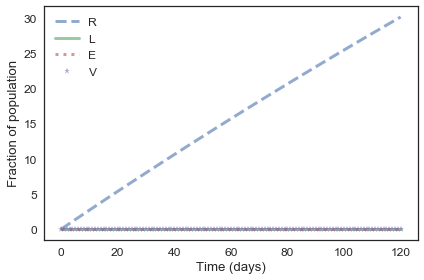

In [138]:
plot_results(results.R, results.L, results.E, results.V)